In [ ]:
#Analyze the Voice Samples and classify them by male and female using Logistic Regression and Random Forest

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import log_loss
from sklearn.preprocessing import OrdinalEncoder

c:\Users\ywong\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Data = 'C:\\test\\voces.csv'
# Read the URL to load datasets
zipData = pd.read_csv(Data)

In [3]:
zipData.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,Masculino
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,Masculino
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,Masculino
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,Masculino
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,Masculino
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,Masculino
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,Masculino
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,Masculino
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,Masculino
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,Masculino


In [4]:
# Finding correlated Variables
zipData.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


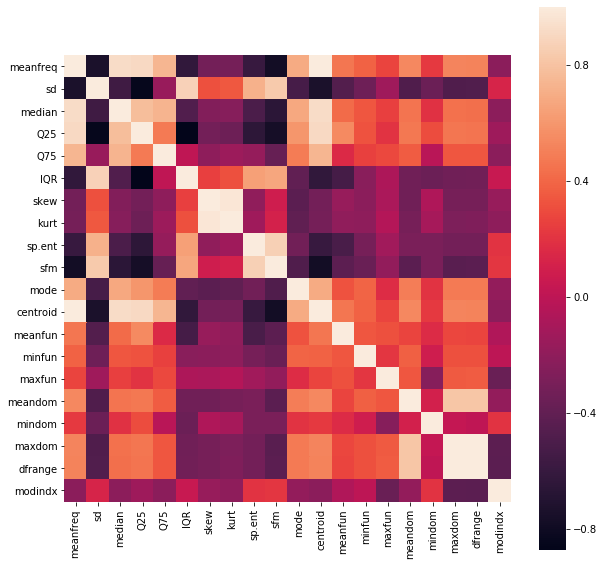

In [5]:
# Correlation Matrix for all variables
corrmat = zipData.corr()
f, ax = plt.subplots(figsize = (10, 10))
sn.heatmap(corrmat, vmax = 1, square = True);


In [6]:
#Encode Categorical Variable
y = zipData['genero']
ord_enc = OrdinalEncoder()
y = ord_enc.fit_transform(zipData[["genero"]])
zipData["genero"] = y

In [7]:
#Drop the dependent variable for X
X = zipData.drop(columns = ["genero"], axis = 1)

In [8]:
# Separate train and test data (80% as Trainging data)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=0)

# Standarize data. Subtract mean and devide by standard deviation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
LogisticRegressionClassLR = LR()
LogisticRegressionClassLR.fit(X_train,y_train)

c:\Users\ywong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\Users\ywong\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Predict test data
y_pred = LogisticRegressionClassLR.predict(X_test)
print(y_pred)
print(y_test)

[0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.

In [27]:
y_pred = np.reshape(y_pred,(634))
y_test = np.reshape(y_test,(634))

In [28]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[289  12]
 [  5 328]]


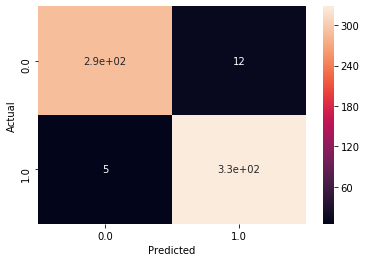

In [29]:
# Pretty print confusion matrix
cm2 = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sn.heatmap(cm2, annot = True)

In [30]:
#Calculate accuracy 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       301
         1.0       0.96      0.98      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [31]:
recall=tp/(tp+fn)
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
print("Recall ",recall)
print("Likelihood Ratio ",recall/(1-recall))

Accuracy= 0.973186119873817
Recall  0.984984984984985
Likelihood Ratio  65.60000000000002


In [17]:
#Likelihood using log_loss
-log_loss(y_test, y_pred)

-0.9261337442943919

In [18]:
#Using Random Forest
RandomForest = RF()
RandomForest.fit(X_train,y_train)

c:\Users\ywong\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\Users\ywong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# Predict test data
y_pred = RandomForest.predict(X_test)
print(y_pred)
print(y_test)

[0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.

In [20]:
y_pred = np.reshape(y_pred,(634))
y_test = np.reshape(y_test,(634))

In [22]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[298   3]
 [ 12 321]]


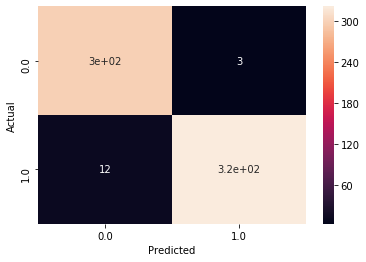

In [21]:
# Task 4: Generate a confusion table
# Pretty print confusion matrix
cm2 = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sn.heatmap(cm2, annot = True)

In [48]:
# Task 4: Calculate accuracy 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       301
         1.0       0.98      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [24]:
recall=tp/(tp+fn)
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
print("Recall ",recall)
print("Likelihood Ratio ",recall/(1-recall))

Accuracy= 0.9763406940063092
Recall  0.963963963963964
Likelihood Ratio  26.75000000000003


In [87]:
#Likelihood
-log_loss(y_test, y_pred)

-0.6537333058892573

In [ ]:
#Overall speaking, classification using random forest with limited small number of samples will give a more accurate result when compare to Logstic Regression